In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

try :
    from catboost import CatBoostRegressor
    from xgboost import XGBRegressor
except Exception as e:
    print(e , "hello")

import warnings

numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject hello


In [4]:
df = pd.read_csv("data/stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
x = df.drop('math_score' , axis=1)

In [7]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y = df['math_score']

In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
# Create Column Transformer with 3 types of transformers
num_cols = x.select_dtypes(include="number").columns.to_list()
cat_cols = x.select_dtypes(include="object").columns.to_list()

from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_scaler = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder" , ohe_scaler , cat_cols),
         ("StandardScaler" , numeric_transformer , num_cols),
    ]
)

In [11]:
x = preprocessor.fit_transform(x)

In [12]:
x.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape  ,  x_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate(y_test , predicted):
    mae = mean_absolute_error(y_test , predicted)
    mse = mean_squared_error(y_test , predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test , predicted)

    return mae , rmse , r2

In [15]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    # "XGBRegressor": XGBRegressor(),
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # for training dataset
    train_mae , train_rmse , train_r2 = evaluate(y_train , y_train_pred)
    #for testing dataset
    test_mae , test_rmse ,test_r2 = evaluate(y_test , y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803




Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
---------------------------

In [17]:
pd.DataFrame(list(zip(model_list , r2_list)), columns=['Model name' , 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.849716
6,AdaBoost Regressor,0.840888
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.736273


#### Linear Regression

In [18]:
lr = LinearRegression(fit_intercept=True)

lr.fit(x_train , y_train)
predict = lr.predict(x_test)
score = r2_score(y_test , predict)

print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 0.88


#### Plot y_test & prediction

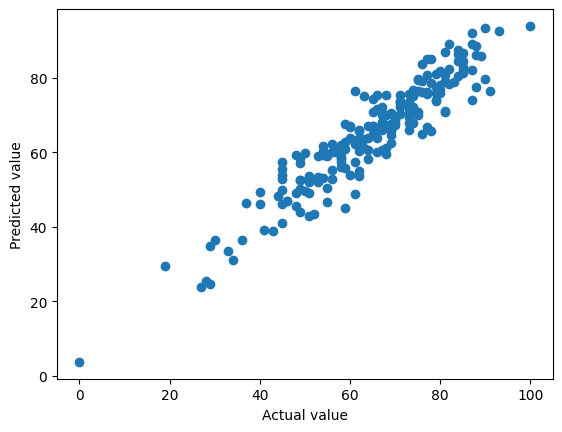

In [19]:
plt.scatter(y_test , predict)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

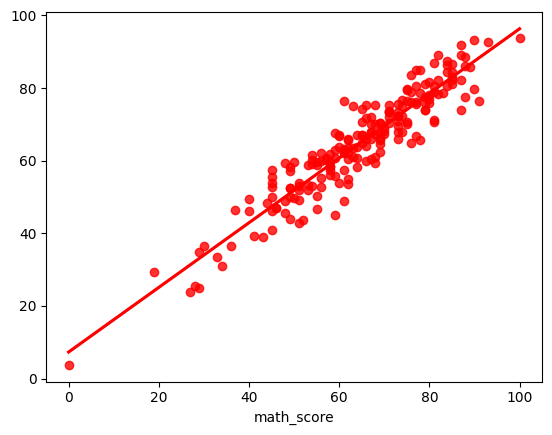

In [21]:
sns.regplot(x=y_test , y=predict , ci=None , color='red')
plt.show()

### Difference between Actual & Predicted

In [22]:
pd.DataFrame({"Actual Value" : y_test , "Predicted Value" : predict , "Difference" : y_test - predict})

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
